In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set()

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


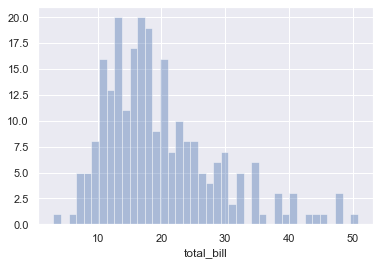

In [6]:
sns.distplot(tips['total_bill'],kde=False,bins=40)
# Kde Kernel Density Estimates

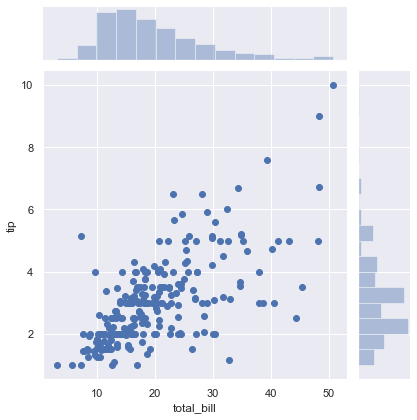

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)

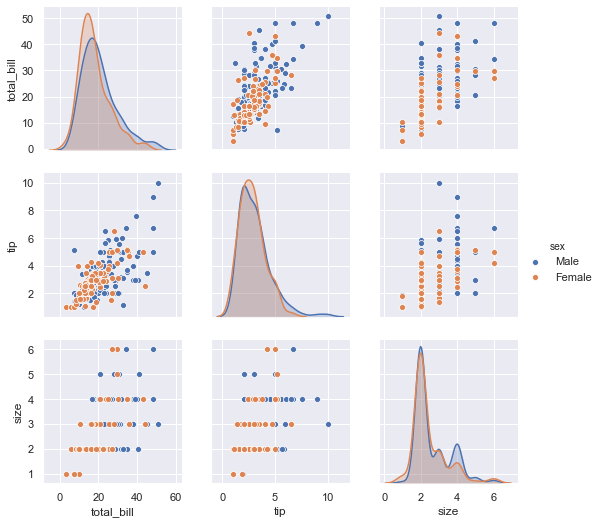

In [8]:
sns.pairplot(tips,hue='sex')
sns.set()

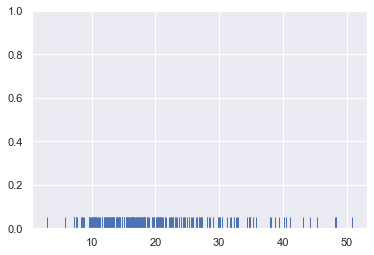

In [9]:
sns.rugplot(tips['total_bill'])

(0, 1)

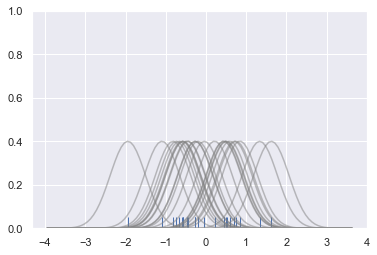

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

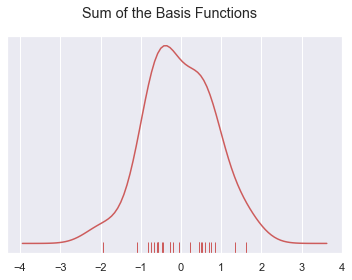

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

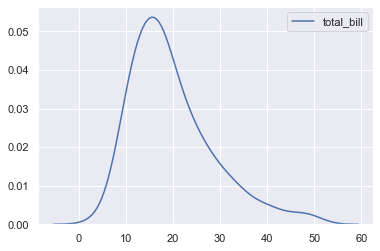

In [12]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

In [13]:
import seaborn as sns
%matplotlib inline
tips=sns.load_dataset('tips')
import numpy as np
sns.set()
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


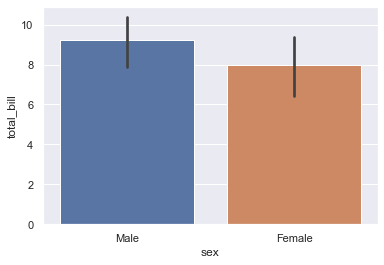

In [14]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

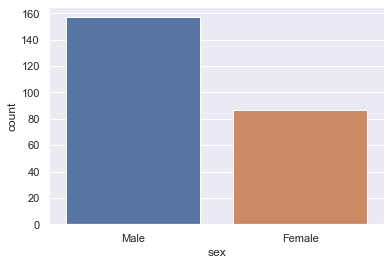

In [15]:
sns.countplot(x='sex',data=tips)

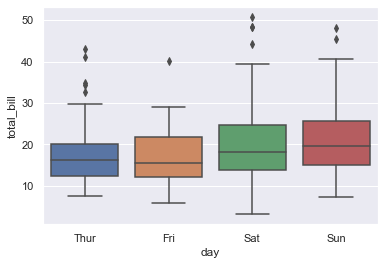

In [16]:
sns.boxplot(x='day',y='total_bill',data=tips)

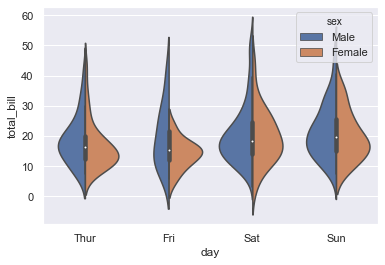

In [17]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

C:\Users\mike\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


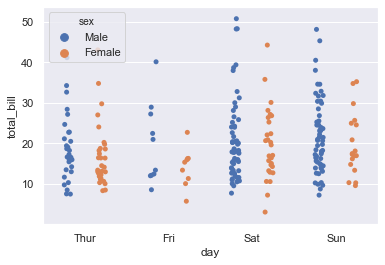

In [18]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter= True, hue='sex',split=True)

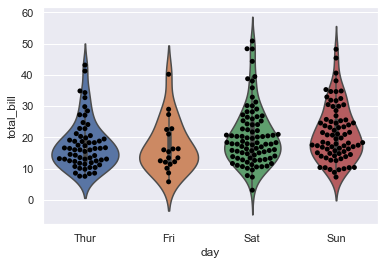

In [19]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

C:\Users\mike\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


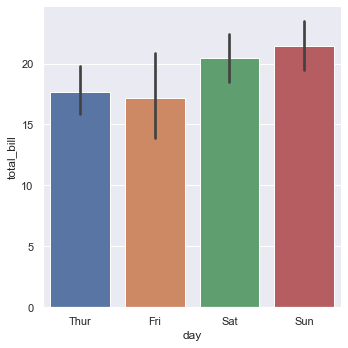

In [20]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

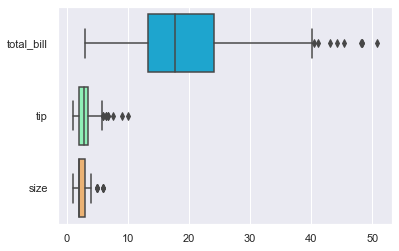

In [21]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

# Matrix Plots

In [22]:
import seaborn as sns
%matplotlib inline
tips= sns.load_dataset('tips')
flights=sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
 tc = tips.corr()

In [25]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


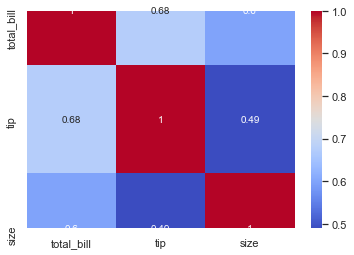

In [26]:
sns.heatmap(tc, annot=True,cmap='coolwarm')
sns.set()

In [27]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

In [28]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


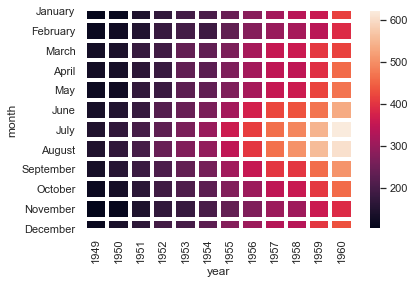

In [29]:
sns.heatmap(fp,linecolor='white',linewidths=3)

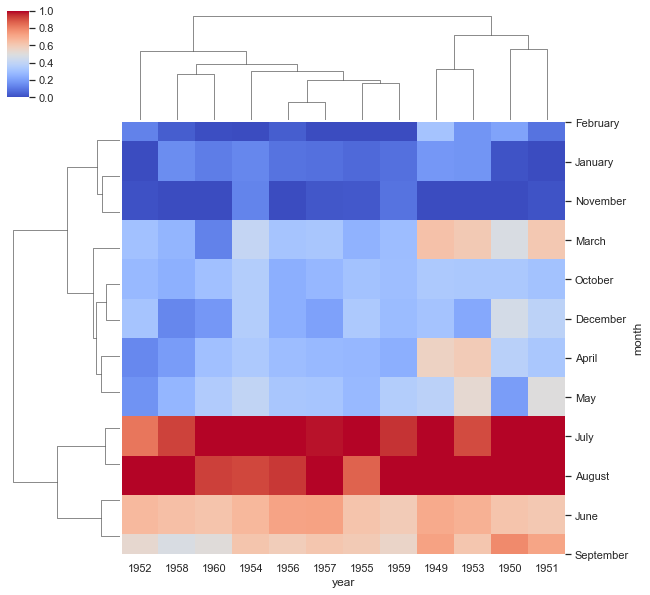

In [30]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [31]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


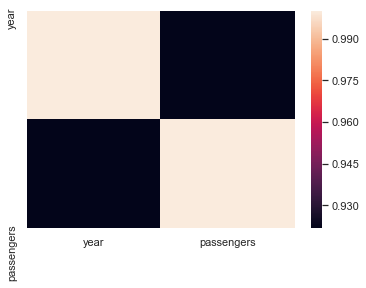

In [32]:
sns.heatmap(flights.corr())

# Grids

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
iris = sns.load_dataset('iris')

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


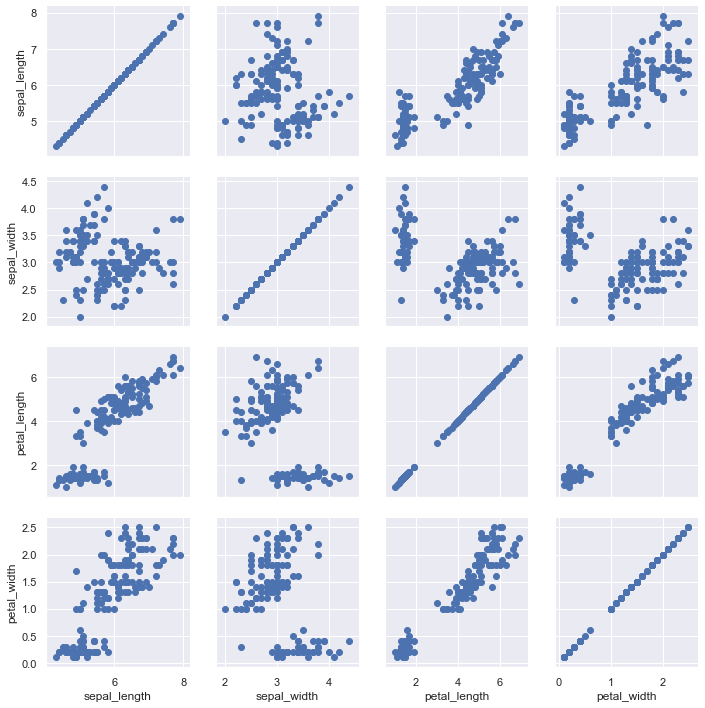

In [42]:
g = sns.PairGrid(iris)
g.map(plt.scatter) 

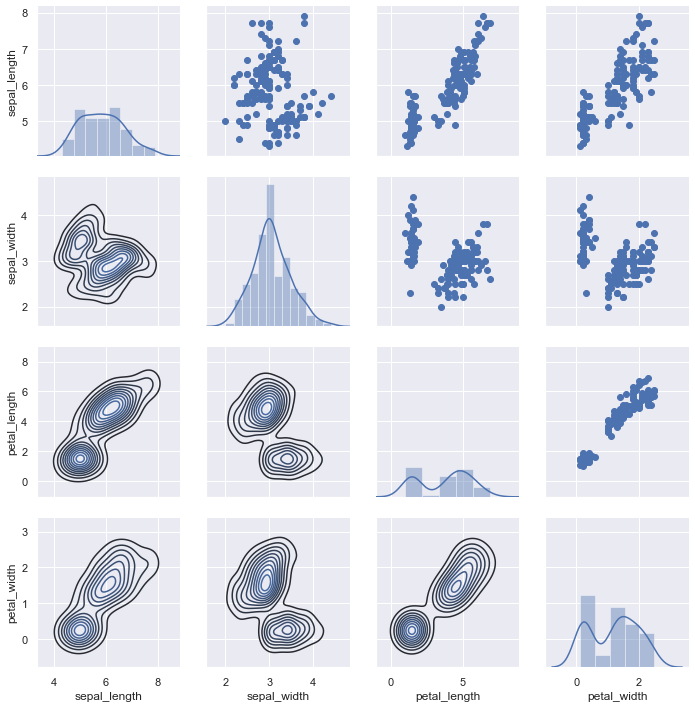

In [44]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [45]:
tips=sns.load_dataset('tips')

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


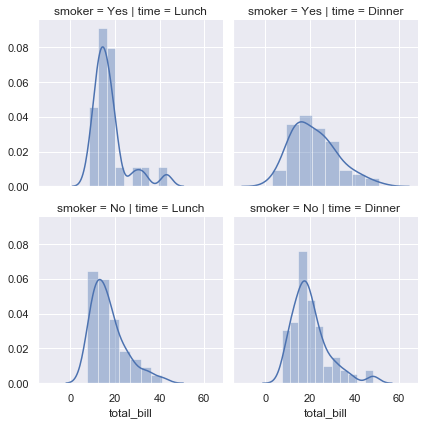

In [48]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

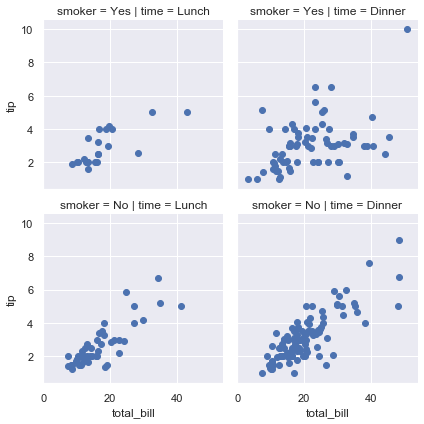

In [49]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

# Regression Plots

In [50]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


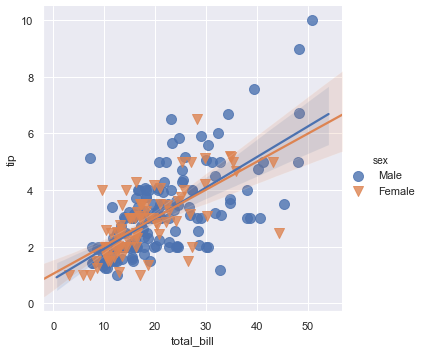

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue = 'sex',markers=['o','v'],
          scatter_kws={'s':100})

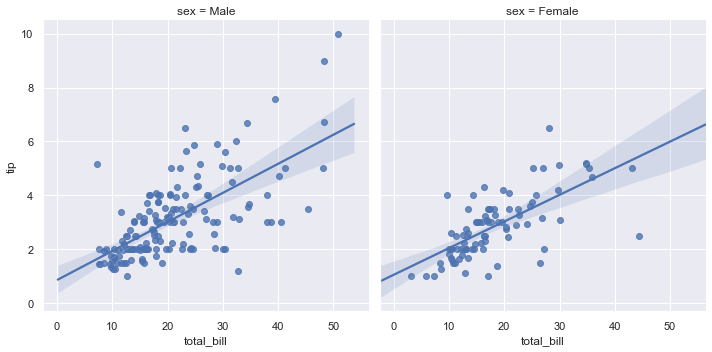

In [59]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex')

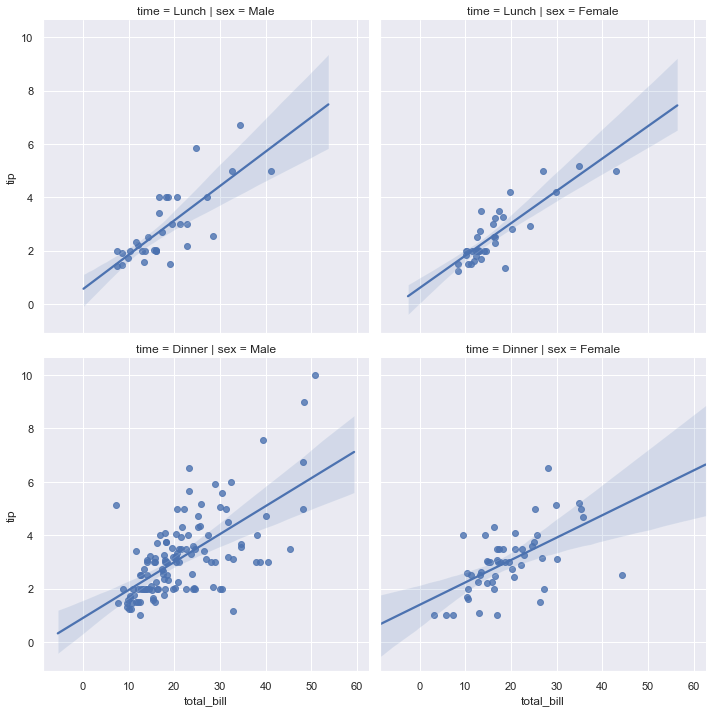

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex', row='time')

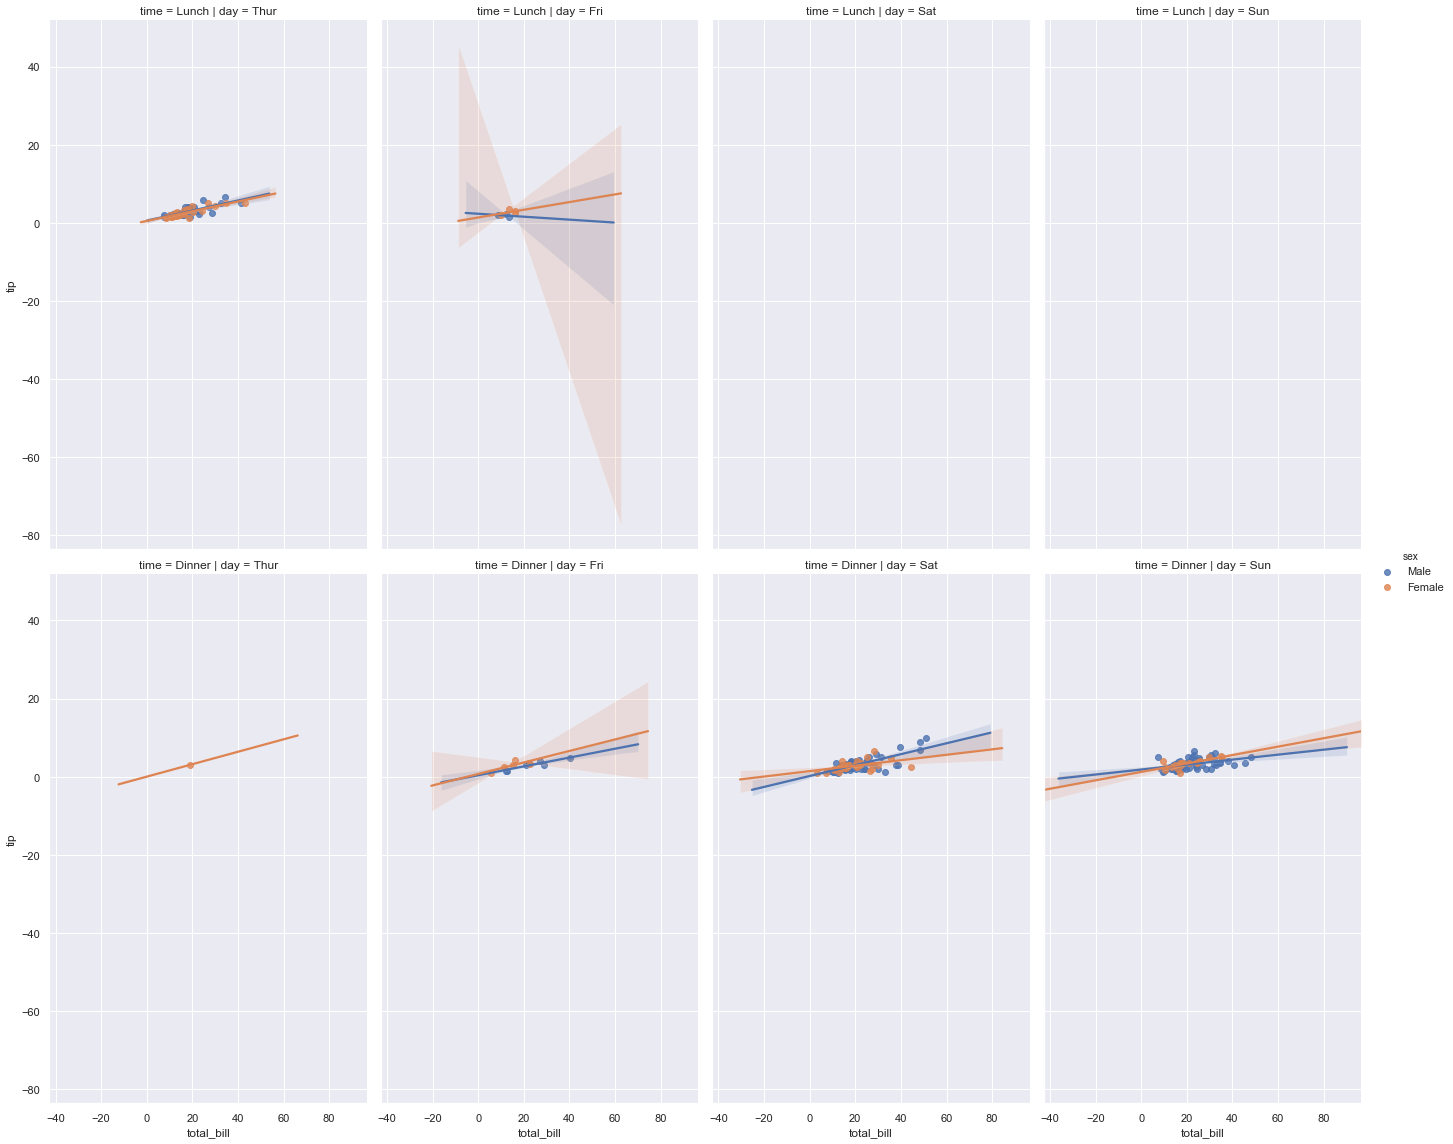

In [64]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='day', row='time', hue='sex',
          aspect=0.6, height=8)

# Style and Color

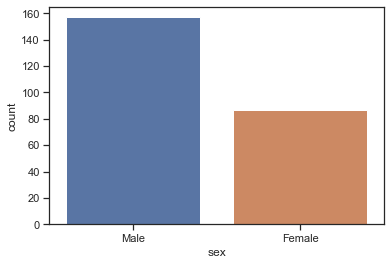

In [66]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

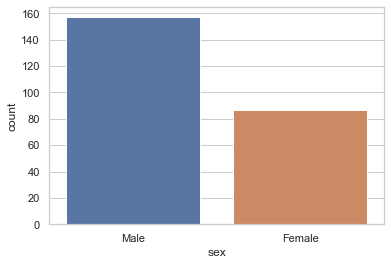

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

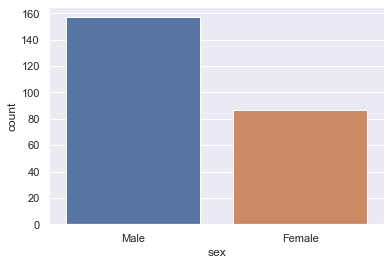

In [68]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

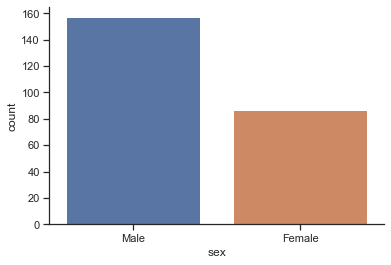

In [69]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

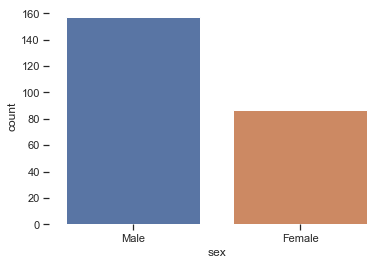

In [70]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

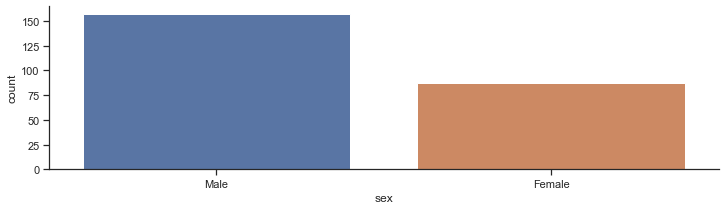

In [71]:
plt.figure(figsize=(12,3))
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

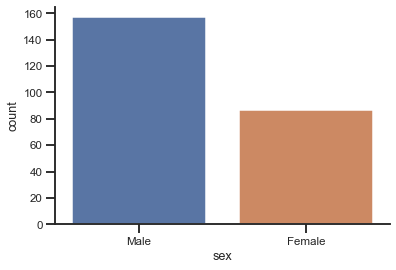

In [79]:
sns.set_context('talk', font_scale=0.7)
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

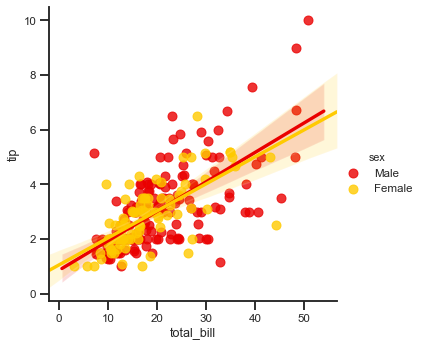

In [81]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='hot')